In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [2]:
df_train = pd.read_csv("nndata/train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = df_train.pop('label')
features = np.array(df_train)
features_train, features_test, labels_train, labels_test = train_test_split(features, 
labels, test_size=0.33, random_state=42)

In [13]:
clf = svm.SVC(C=0.5, gamma='scale', kernel='rbf', random_state=1234)
clf.fit(features_train, labels_train)

SVC(C=0.5, random_state=1234)

In [14]:
prediction = clf.predict(features_test)
prediction.shape

(13860,)

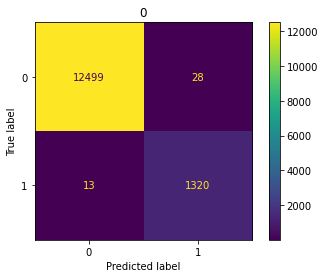

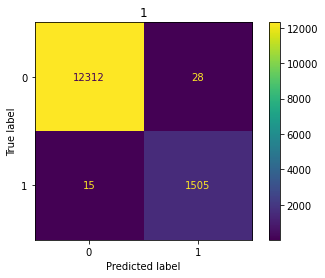

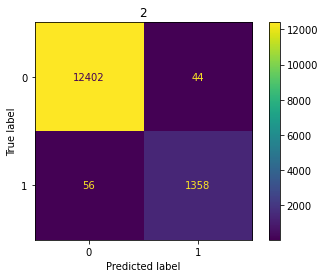

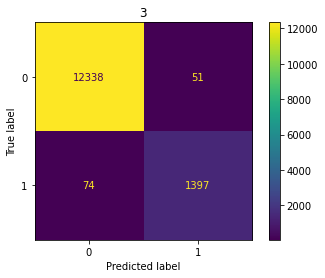

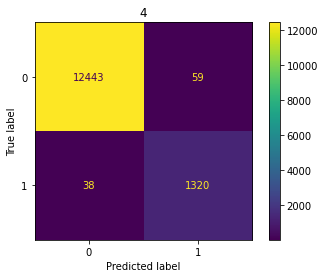

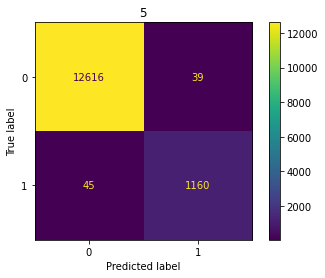

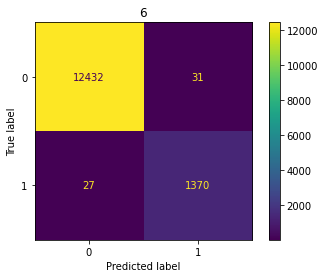

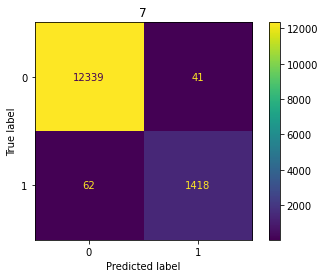

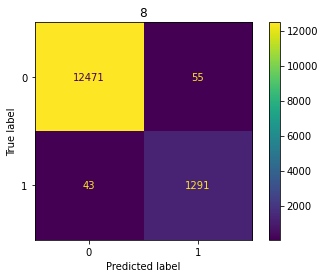

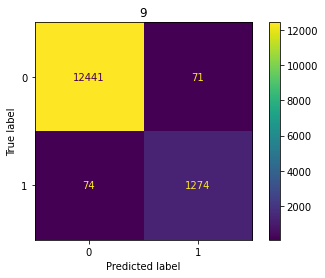

In [19]:
cf = metrics.multilabel_confusion_matrix(y_true=labels_test, y_pred=prediction, labels=list(range(10)))
for i, v in enumerate(cf):
    disp = metrics.ConfusionMatrixDisplay(v).plot()
    plt.title(f'{i}')


In [20]:
metrics.accuracy_score(y_true=labels_test, y_pred=prediction)

0.9677489177489178

In [21]:
metrics.recall_score(y_true=labels_test, y_pred=prediction, average='macro')

0.9676793493859221

Este modelo es menos preciso y más tardado que los modelos basados en NN